In [1]:
import numpy as np
import torch
from torch import nn
from game import *

In [2]:
class h_scorer(nn.Module):
    def __init__(self):
        super().__init__()
        self.d1 = nn.Linear(14, 1,bias=False)
    
    def forward(self,x):
        return self.d1(x)
model = h_scorer()
checkpoint = torch.load('lin_4999.pth')
model.load_state_dict(checkpoint) 
loss_fn = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
num_par = sum([l.numel() for l in model.parameters() if l.requires_grad])
print(f"There are {num_par} parameters in the model.")
print(model)

There are 14 parameters in the model.
h_scorer(
  (d1): Linear(in_features=14, out_features=1, bias=False)
)


In [3]:
def Q_play(game,print_scores=False):
    moves = game.get_moves()
    scores = np.zeros(len(moves))
    for i in range(len(moves)):
        x = game.prepare_input(moves,i)
        scores[i] = model(x.unsqueeze(0)).item()
    if print_scores:
        print(scores)
    return moves[np.argmax(scores)]

def h_play(game):
    moves = game.get_moves()
    scores = np.zeros(len(moves))
    for i in range(len(moves)):
        scores[i] = game.try_score(moves[i])*game.turn
    return moves[np.argmax(scores)]

def r_play(game):
    moves = game.get_moves()
    return moves[np.random.choice(np.arange(len(moves)))]

def user_play(game):
    moves = game.get_moves()
    print(game.hands[(game.turn+1)//2])
    game.show_moves(moves)
    x = int(input("Enter move you would like to play: "))
    return moves[x]

def comp_players(p1,p2,show_board=False):
    game = Sequence()
    i = 0
    while game.check_winner()==0:
        if i%2 == 0:
            move = p1(game)
            game.play(move)
        else:
            move = p2(game)
            game.play(move)
        i += 1
    if show_board:
        game.show_board()
    return game.check_winner()

[ 2  6 36 31 27]


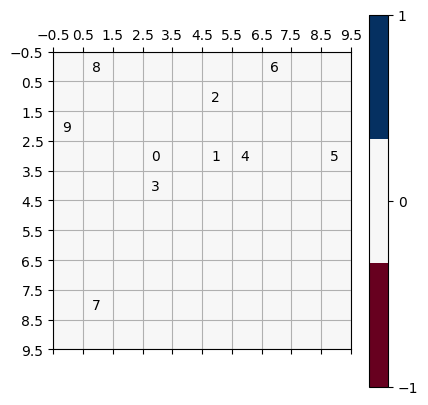

Enter move you would like to play:  1


[19  6 36 31 27]


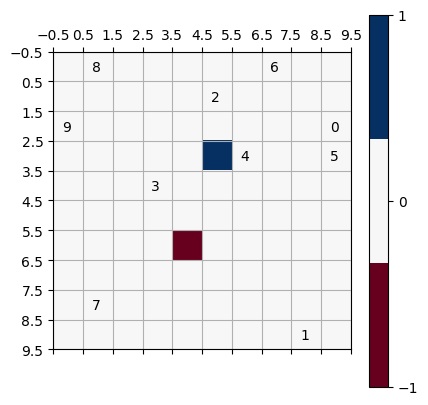

Enter move you would like to play:  4


[19  6 15 31 27]


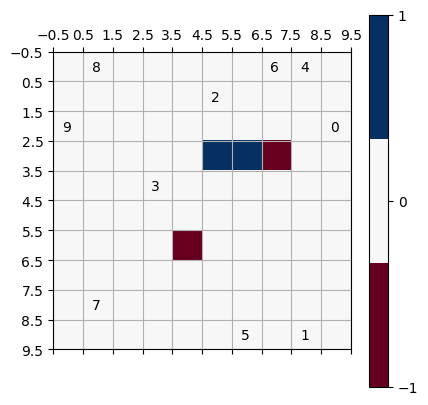

Enter move you would like to play:  4


[19  6 -1 31 27]


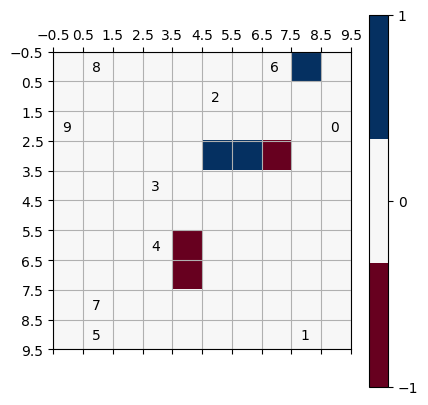

Enter move you would like to play:  6


[19  6 -1 17 27]


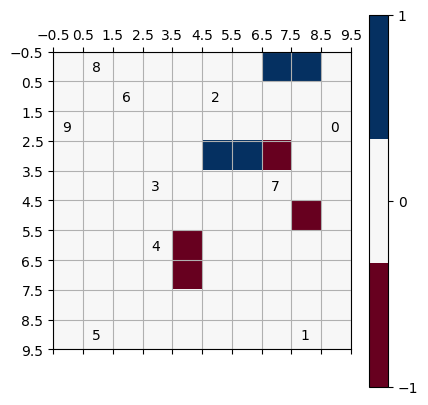

Enter move you would like to play:  2


[19 38 -1 17 27]


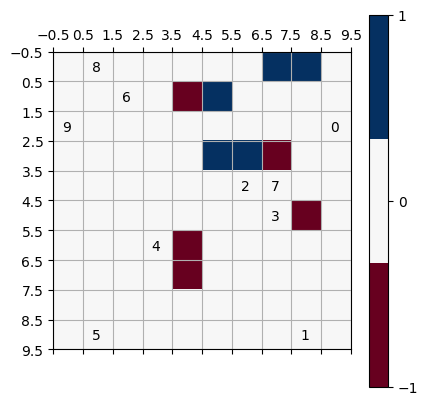

Enter move you would like to play:  2


[19  3 -1 17 27]


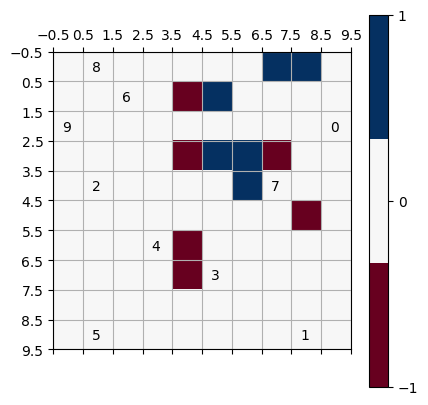

Enter move you would like to play:  7


[19  3 -1  9 27]


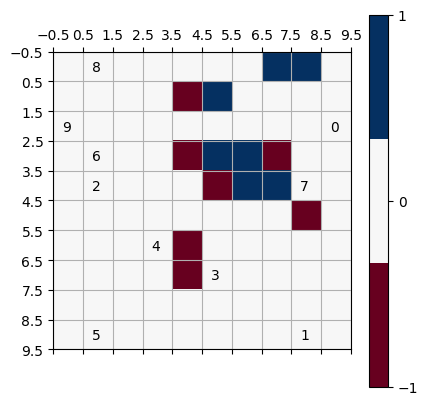

Enter move you would like to play:  7


[19  3 -1  0 27]


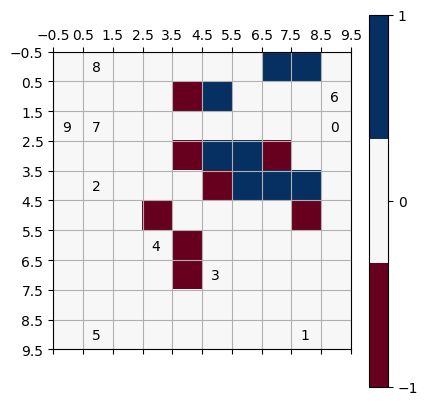

Enter move you would like to play:  3


[19 17 -1  0 27]


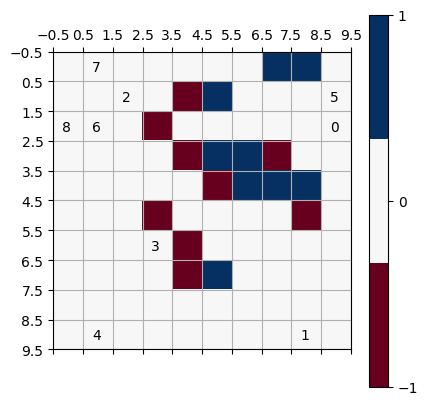

Enter move you would like to play:  2


[19 50 -1  0 27]


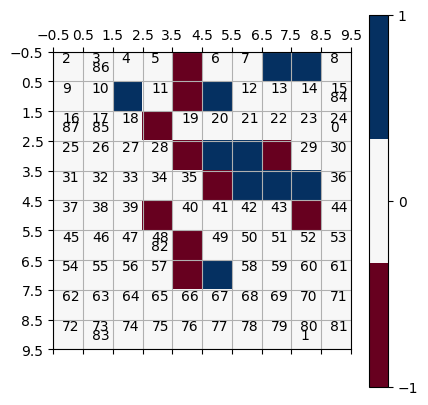

Enter move you would like to play:  0


[ 4 50 -1  0 27]


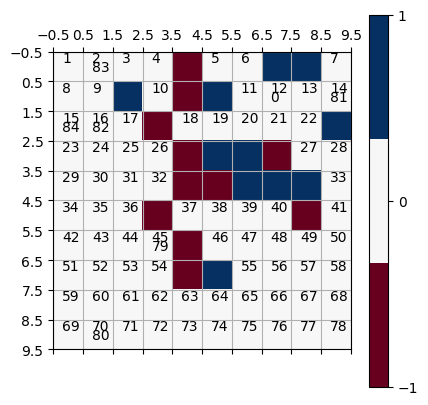

Enter move you would like to play:  0


[34 50 -1  0 27]


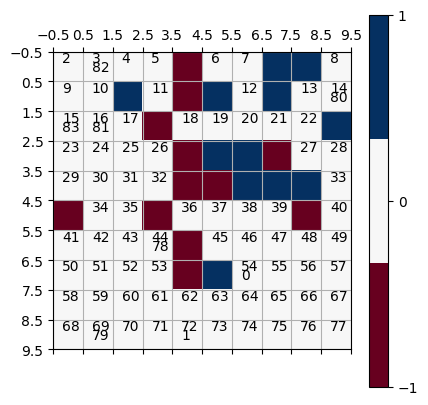

Enter move you would like to play:  80


[34 50 -1  7 27]


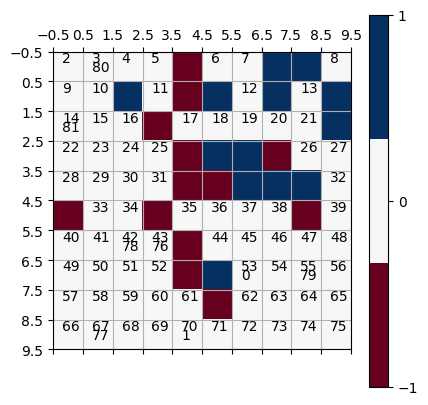

Enter move you would like to play:  0


[21 50 -1  7 27]


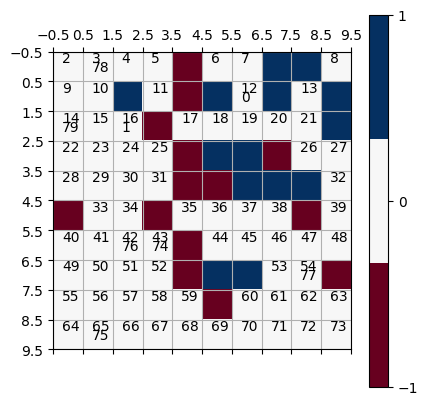

Enter move you would like to play:  0


[25 50 -1  7 27]


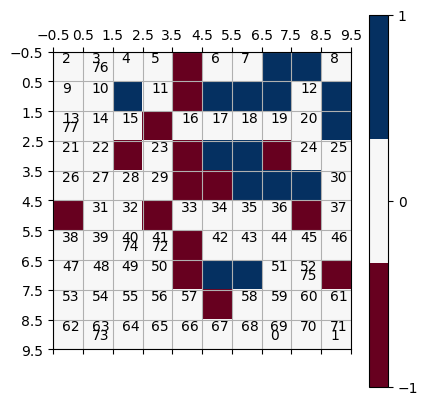

Enter move you would like to play:  12


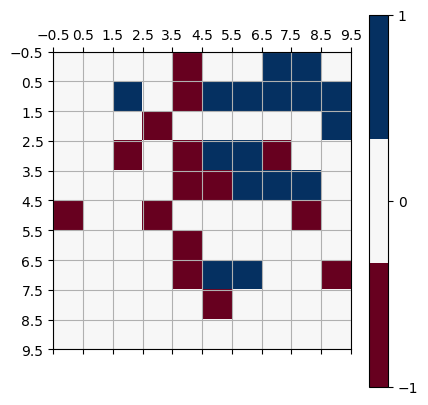

1

In [5]:
comp_players(user_play,Q_play,show_board=True)